<a href="https://colab.research.google.com/github/Saikumar1422/excelr-data-science-assignments/blob/main/decision_tree_fraud_check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### 1 - Business Problem
___A cloth manufacturing company is interested to know about the segment or attributes causes high sale___

# 2 - Data collection and description

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn import externals
from io import StringIO
import pydotplus
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz

# 1 - Business Problem
___Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"___

# **2 - Data collection and description**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [ ]:
df1=df.copy()

In [ ]:
df1.describe().T


,count,mean,std,min,25%,50%,75%,max
Taxable.Income,600.0,55208.375000,26204.827597,10003.0,32871.50,55074.5,78611.75,99619.0
City.Population,600.0,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Work.Experience,600.0,15.558333,8.842147,0.0,8.00,15.0,24.00,30.0


In [ ]:
df1.isnull().sum()


Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [ ]:
df1.dtypes


Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

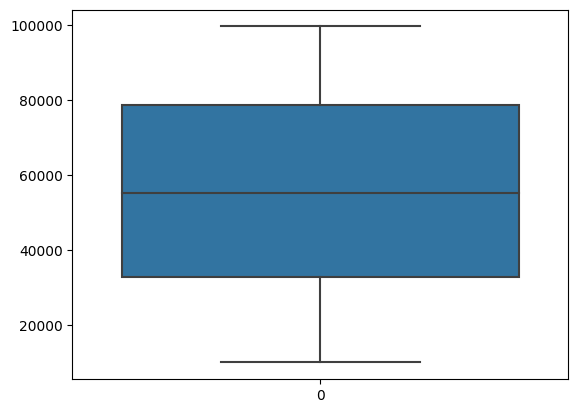

In [ ]:
ax = sns.boxplot(df1['Taxable.Income'])


In [ ]:
plt.rcParams["figure.figsize"] = 9,5


Skew: 0.030014788906377175
Kurtosis: -1.1997824607083138


<ipython-input-13-0d0d5412d108>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df1['Taxable.Income'],shade=True,color='b')


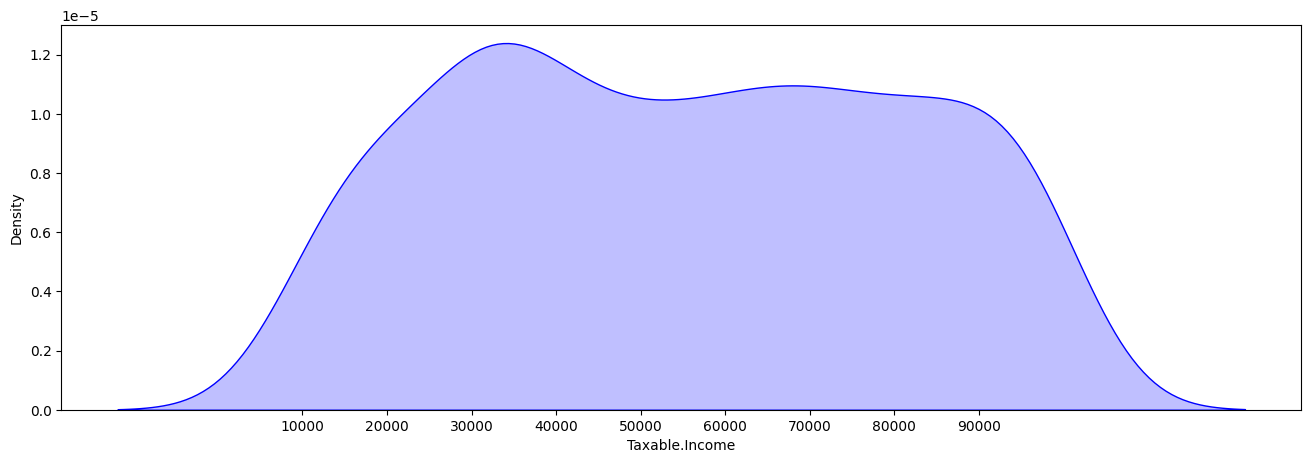

In [ ]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df1['Taxable.Income'].skew()))
print("Kurtosis: {}".format(df1['Taxable.Income'].kurtosis()))
ax = sns.kdeplot(df1['Taxable.Income'],shade=True,color='b')
plt.xticks([i for i in range(10000,100000,10000)])
plt.show()

## The data is Skwed on the right
# The data has negative Kurtosis

In [ ]:
obj_colum = df1.select_dtypes(include='object').columns.tolist()


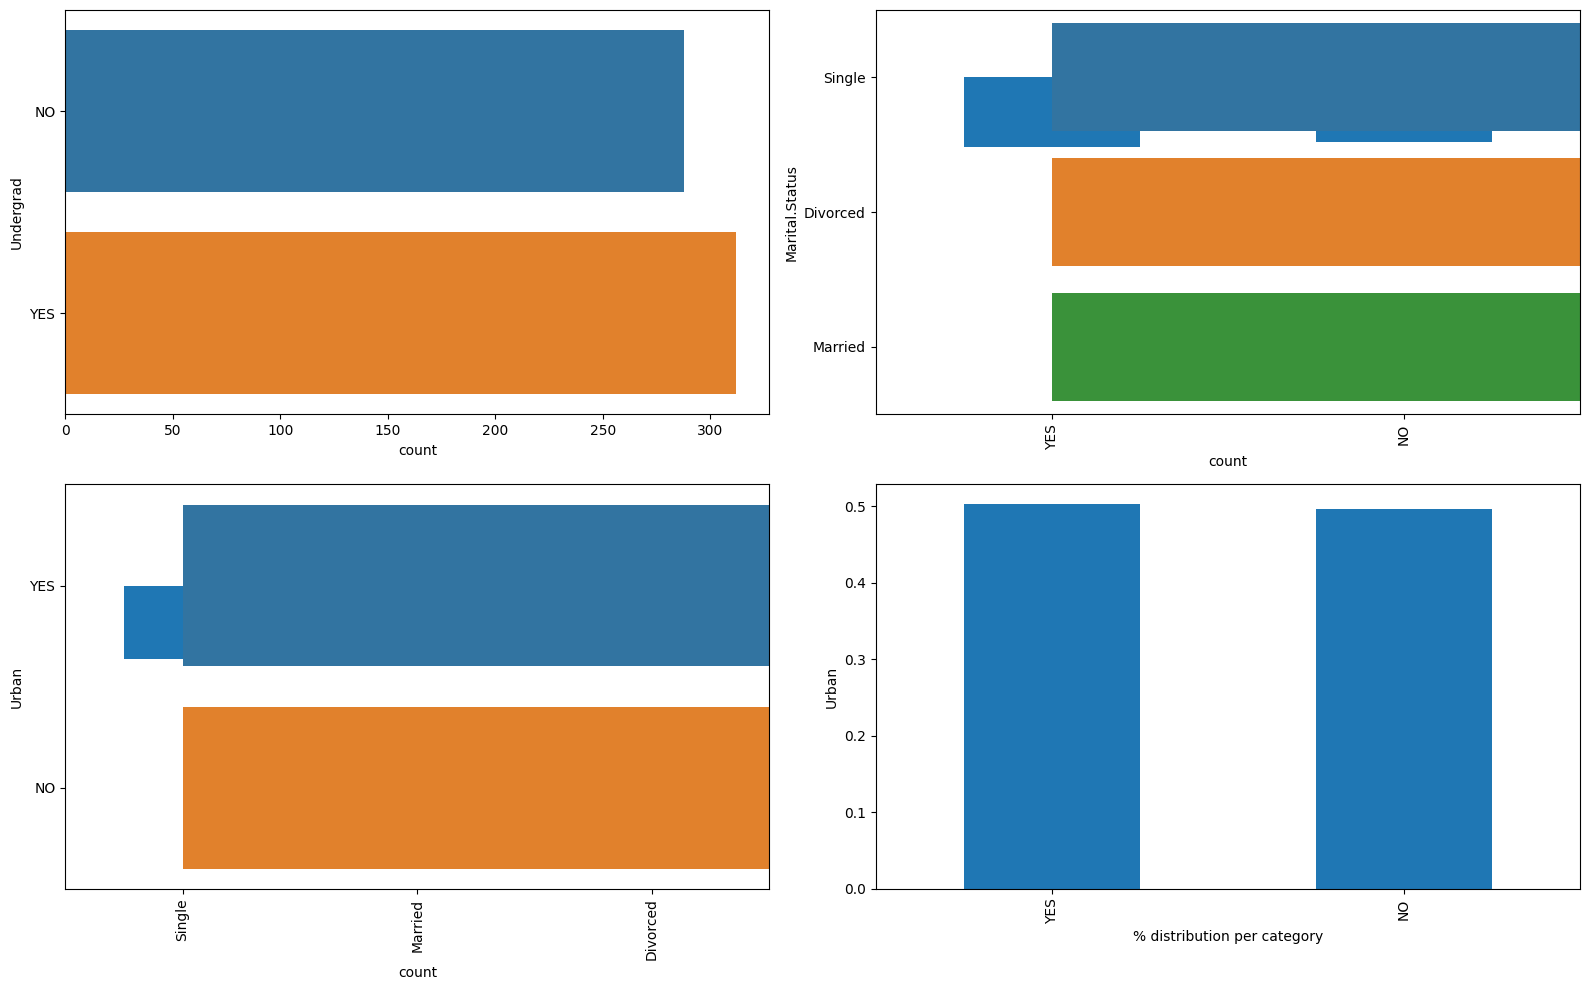

In [ ]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df1,y=col)
    plt.subplot(2,2,i+1)
    df1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

In [ ]:
num_columns = df1.select_dtypes(exclude='object').columns.tolist()


<ipython-input-17-580362cfca90>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col],color='g',shade=True)
<ipython-input-17-580362cfca90>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col],color='g',shade=True)
<ipython-input-17-580362cfca90>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col],color='g',shade=True)


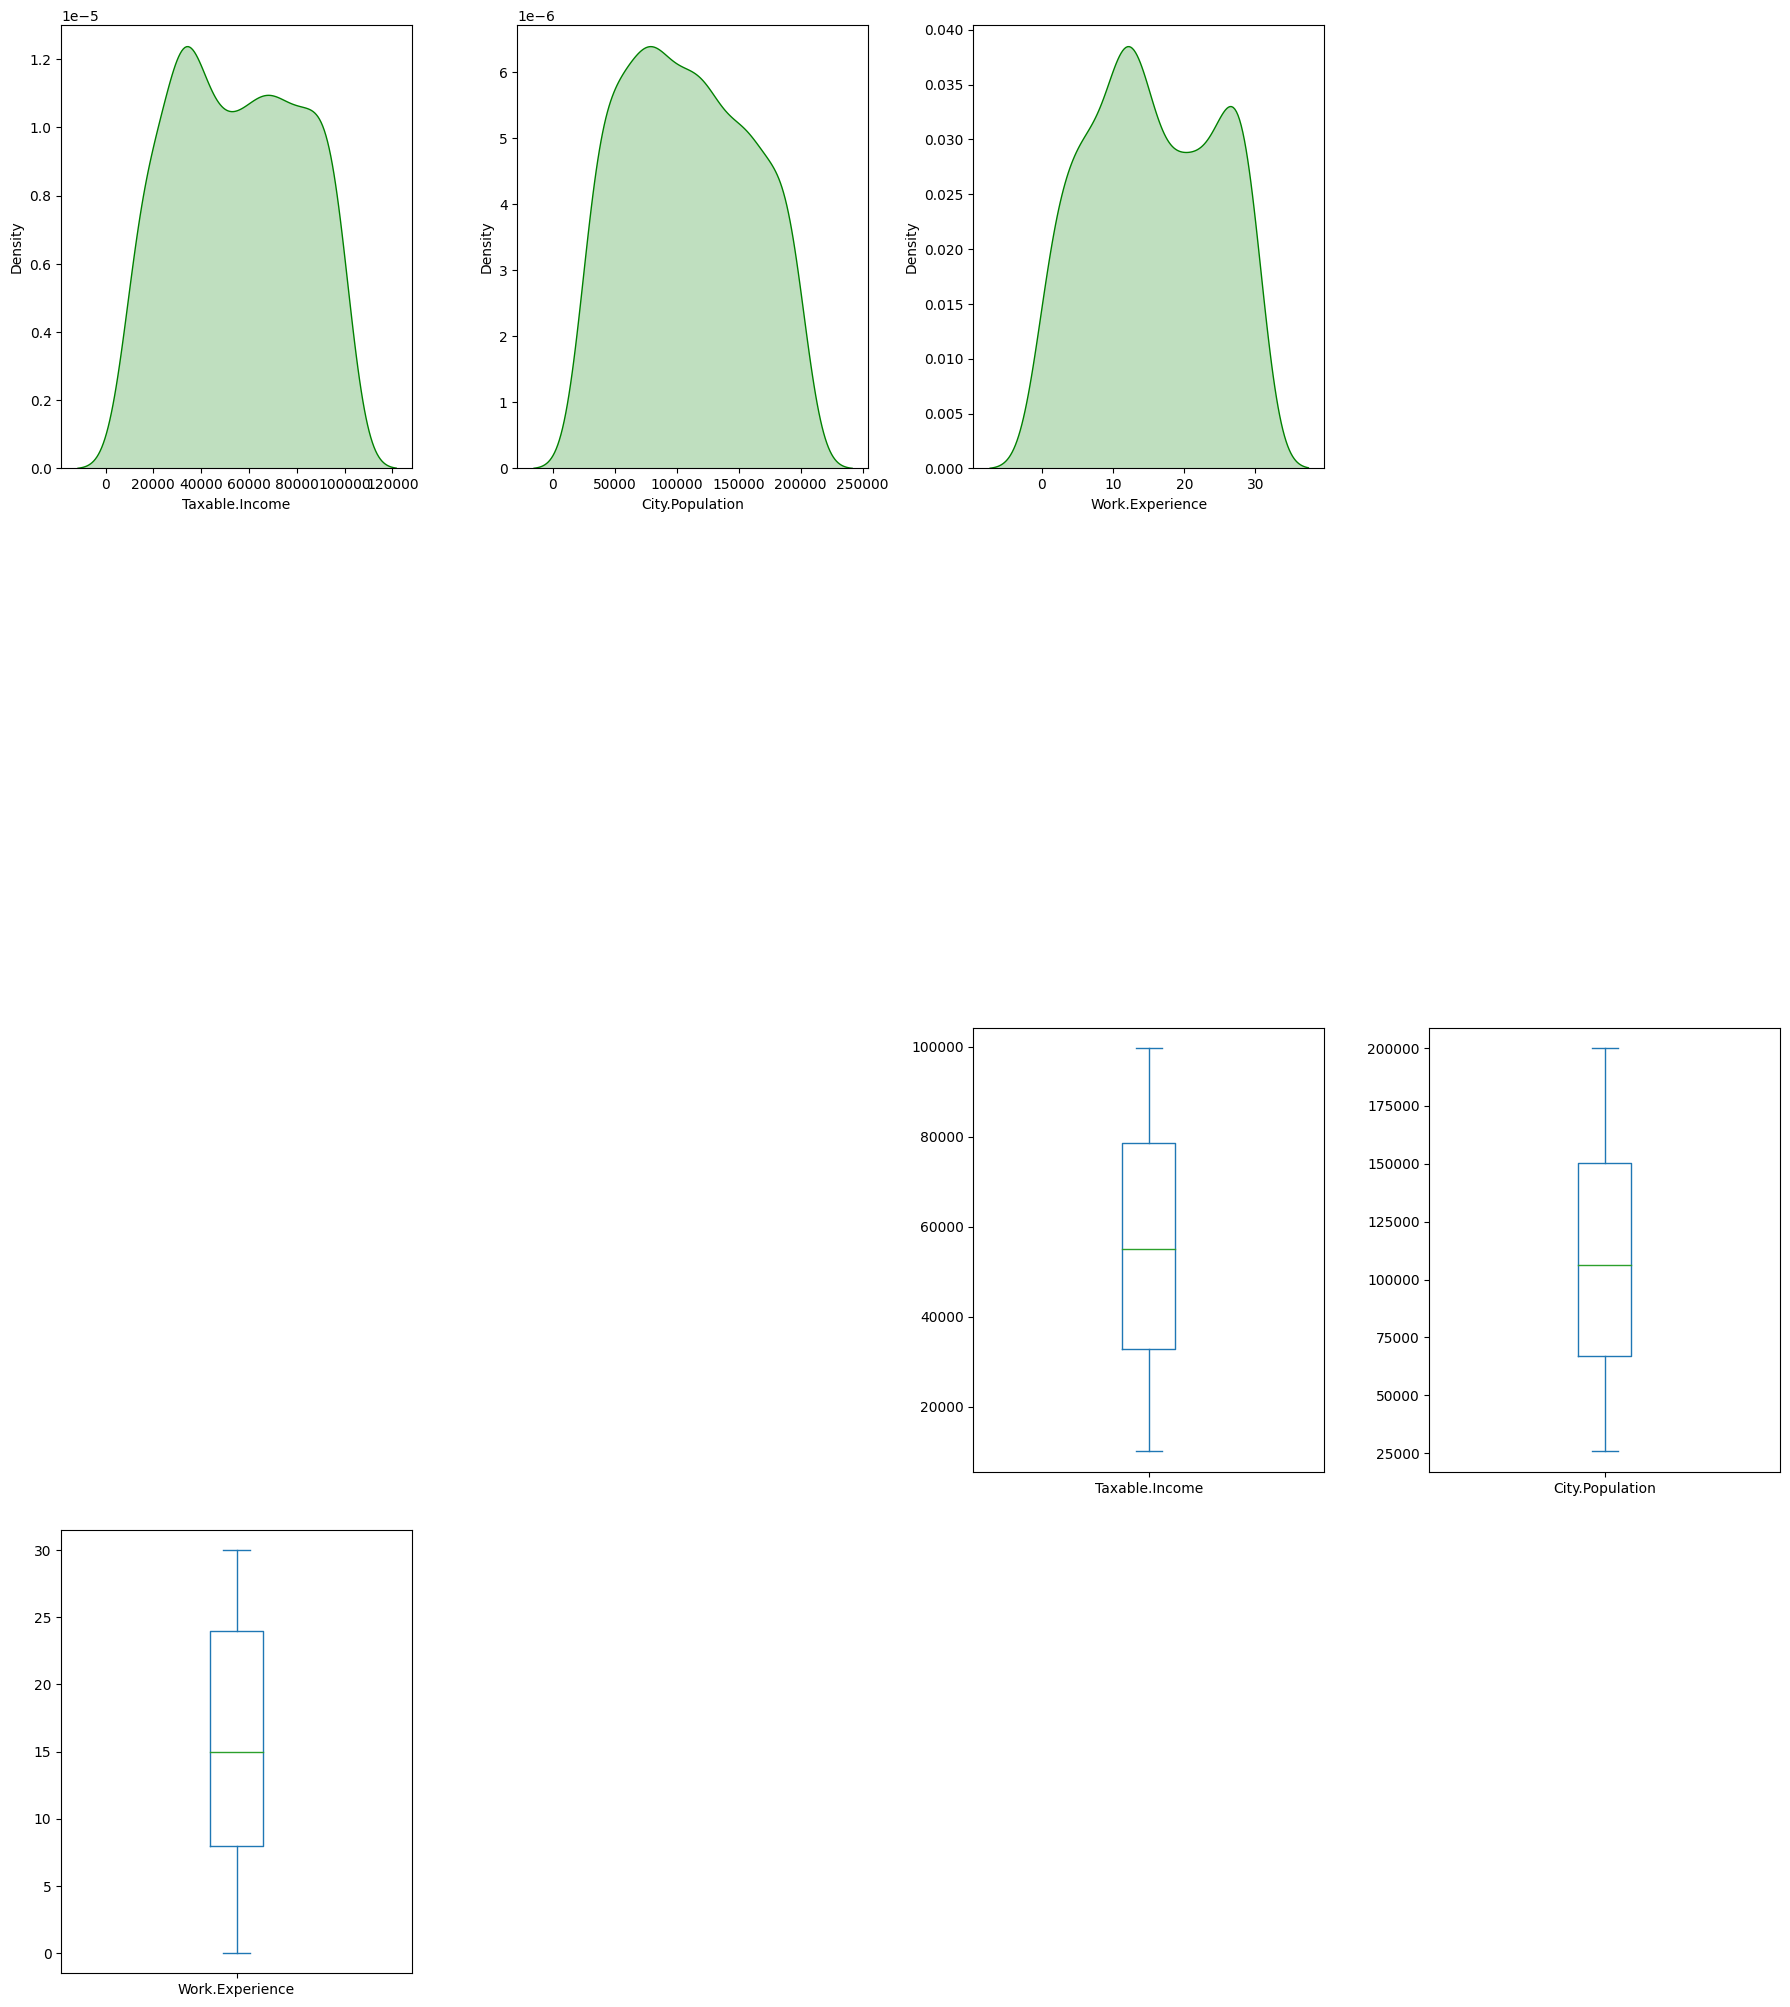

,Taxable.Income,City.Population,Work.Experience
skewness,0.030015,0.125009,0.018529
kurtosis,-1.199782,-1.120154,-1.167524


In [ ]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout()
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [ ]:
df1 = pd.get_dummies(df1, columns = ['Undergrad','Marital.Status','Urban'])


In [ ]:
corr = df1.corr()


In [ ]:
corr = df1.corr()


<Axes: >

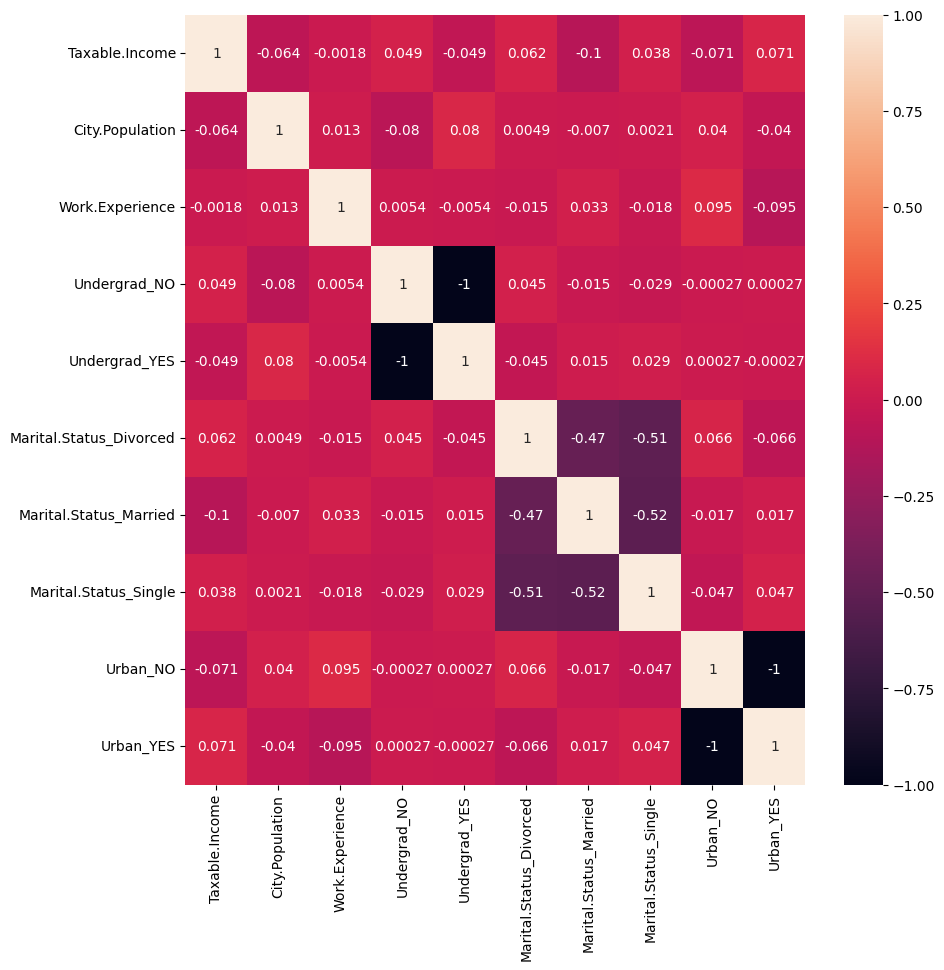

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

# 3 - Decision Tree
Since the target variable is continious, we create a class of taxable_income <= 30000 as "Risky" and others are "Good"

In [ ]:
df1['Taxable.Income']=pd.cut(df1['Taxable.Income'],bins=[0,30000,100000],labels=['risky','good'])


In [ ]:
list(df1.columns)


['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES']

In [ ]:
X = df1.iloc[:,1:10]
y = df1.iloc[:,0]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)


In [ ]:
y_train.value_counts()


good     378
risky    102
Name: Taxable.Income, dtype: int64

In [ ]:
model = DT(criterion='entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
pred_train = model.predict(x_train)


In [ ]:
accuracy_score(y_train,pred_train)


1.0

In [ ]:
confusion_matrix(y_train,pred_train)


array([[378,   0],
       [  0, 102]])

In [ ]:
pred_test = model.predict(x_test)


In [ ]:
accuracy_score(y_test,pred_test)


0.5833333333333334

In [ ]:
confusion_matrix(y_test,pred_test)


array([[66, 32],
       [18,  4]])

In [ ]:
df_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})


In [ ]:
df_t


,Actual,Predicted
243,good,good
197,good,good
144,good,good
77,good,good
253,good,risky
...,...,...
402,good,good
30,good,good
60,good,good
428,risky,risky


In [ ]:
cols = list(df1.columns)



In [ ]:
predictors = cols[1:10]
target = cols[0]

In [ ]:
dot_data = StringIO()


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree


[Text(0.6902173913043478, 0.9814814814814815, 'Work.Experience <= 23.5\nsamples = 480\nvalue = [378, 102]\nclass = T'),
 Text(0.452445652173913, 0.9444444444444444, 'Work.Experience <= 17.5\nsamples = 361\nvalue = [275, 86]\nclass = T'),
 Text(0.297554347826087, 0.9074074074074074, 'City.Population <= 197925.0\nsamples = 285\nvalue = [224, 61]\nclass = T'),
 Text(0.2866847826086957, 0.8703703703703703, 'City.Population <= 86647.0\nsamples = 283\nvalue = [224, 59]\nclass = T'),
 Text(0.20244565217391305, 0.8333333333333334, 'City.Population <= 82708.5\nsamples = 114\nvalue = [95, 19]\nclass = T'),
 Text(0.19157608695652173, 0.7962962962962963, 'City.Population <= 81571.5\nsamples = 102\nvalue = [83, 19]\nclass = T'),
 Text(0.18070652173913043, 0.7592592592592593, 'Work.Experience <= 13.5\nsamples = 100\nvalue = [83, 17]\nclass = T'),
 Text(0.1331521739130435, 0.7222222222222222, 'City.Population <= 53216.0\nsamples = 77\nvalue = [67, 10]\nclass = T'),
 Text(0.07065217391304347, 0.685185

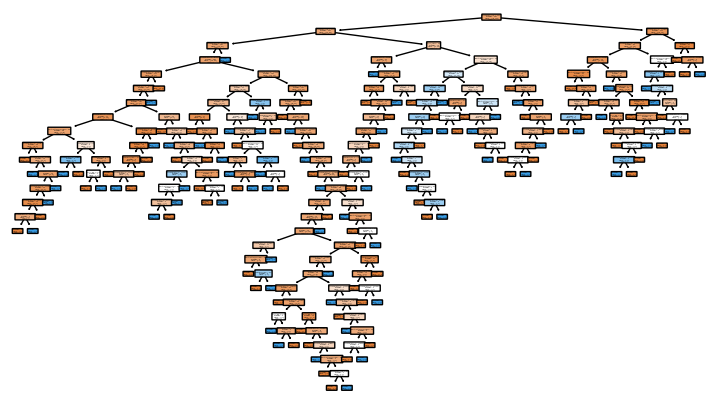

In [ ]:
# gf=export_graphviz(model, out_file = dot_data ,filled = True,rounded =True,feature_names = predictors,class_names = target, impurity = False)
plot_tree(model,filled = True,rounded =True,feature_names = predictors,class_names = target, impurity = False)

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


In [ ]:
graph.write_png('fraud_full.png')


True

# 4 - Conclusion
Since the accuracy of the Training set is 100% we test the accurancy on the test data which is 69%
As seen in the confusion matrix of Test data 82 instances are presdected correctly and 38 instances are not

In [ ]:
model.feature_importances_


array([0.6276942 , 0.18395149, 0.01658326, 0.03587817, 0.03742348,
       0.02757198, 0.03030425, 0.02974034, 0.01085285])

In [ ]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [ ]:
fi

,feature,importance
0,City.Population,0.627694
1,Work.Experience,0.183951
4,Marital.Status_Divorced,0.037423
3,Undergrad_YES,0.035878
6,Marital.Status_Single,0.030304
7,Urban_NO,0.029740
5,Marital.Status_Married,0.027572
2,Undergrad_NO,0.016583
8,Urban_YES,0.010853
